# Exemplo de assimetria negativa

In [ ]:
# Exemplo de caminho: pode ser uma pasta dentro do seu diretório home
# Lembre-se que o R pode adicionar subdiretórios específicos da versão/arquitetura
meu_caminho_biblioteca <- "~/R/library"

# Define a variável de ambiente R_LIBS_USER para a sessão atual
Sys.setenv(R_LIBS_USER = meu_caminho_biblioteca)

# Verifica o valor da variável de ambiente
Sys.getenv("R_LIBS_USER")

# Mostra todos os caminhos de biblioteca que o R está usando
# O seu novo caminho deve aparecer aqui, geralmente como o primeiro da lista.
.libPaths()

In [1]:
# Exemplo de assimetria negativa em R
# Create vectors for Obs and Valor
obs <- 1:70
valor <- c(
    "72,71", "75,83", "76,08", "76,86", "76,98", "77,22", "77,67", "77,93", "79,33", "79,74",
    "80,12", "80,83", "80,89", "81,00", "81,12", "81,54", "81,62", "81,70", "81,83", "82,64",
    "82,93", "83,28", "83,76", "83,99", "84,22", "84,55", "85,10", "86,71", "86,91", "87,01",
    "87,23", "87,36", "87,66", "87,78", "87,91", "87,99", "88,16", "88,73", "89,67", "89,80",
    "89,96", "90,55", "90,57", "91,33", "91,55", "91,84", "92,09", "92,36", "92,59", "92,76",
    "93,10", "93,65", "94,04", "94,20", "94,55", "94,58", "94,59", "94,65", "95,08", "95,81",
    "95,82", "96,03", "96,37", "96,78", "97,02", "97,03", "97,14", "97,50", "97,71", "99,66"
)

# Create the dataframe
df <- data.frame(Obs = obs, Valor = valor)

In [4]:
# Convert Valor to numeric (replace comma with dot for decimal)
df$Valor_numeric <- as.numeric(gsub(",", ".", df$Valor))

# Calculate descriptive statistics
mean_val <- mean(df$Valor_numeric)
median_val <- median(df$Valor_numeric)
sd_val <- sd(df$Valor_numeric)
min_val <- min(df$Valor_numeric)
max_val <- max(df$Valor_numeric)
q1 <- quantile(df$Valor_numeric, 0.25)
q3 <- quantile(df$Valor_numeric, 0.75)
amplitude <- max_val - min_val

# Calculate mode (most frequent value)
# Create classes for the data (using Sturges' rule for number of bins)
n <- length(df$Valor_numeric)
k <- ceiling(1 + log2(n))  # Number of classes
breaks <- seq(min(df$Valor_numeric), max(df$Valor_numeric), length.out = k + 1)
h <- breaks[2] - breaks[1]  # Class width

# Create frequency table
freq_table <- hist(df$Valor_numeric, breaks = breaks, plot = FALSE)
frequencies <- freq_table$counts
classes <- freq_table$mids  # Midpoints

# Find modal class (highest frequency)
modal_index <- which.max(frequencies)
f1 <- frequencies[modal_index]
L <- breaks[modal_index]  # Lower limit of modal class

# Frequencies of adjacent classes
f0 <- if (modal_index > 1) frequencies[modal_index - 1] else 0
f2 <- if (modal_index < length(frequencies)) frequencies[modal_index + 1] else 0

# Calculate mode using King method
mode_val <- L + (f1 - f0) / (2 * f1 - f0 - f2) * h

# Print the results
cat("Média:", mean_val, "\n")
cat("Mediana (Md):", median_val, "\n")
cat("Moda (Mo):", mode_val, "\n")
cat("Desvio-padrão (S):", sd_val, "\n")
cat("Mínimo:", min_val, "\n")
cat("Máximo:", max_val, "\n")
cat("Q₁ (25%):", q1, "\n")
cat("Q₃ (75%):", q3, "\n")
cat("Amplitude:", amplitude, "\n")

Média: 87.79 
Mediana (Md): 87.95 
Moda (Mo): 92.9225 
Desvio-padrão (S): 6.814399 
Mínimo: 72.71 
Máximo: 99.66 
Q₁ (25%): 81.7325 
Q₃ (75%): 93.9425 
Amplitude: 26.95 


In [5]:
# Cálculo do Primeiro Coeficiente de Assimetria de Pearson (As₁)
# Fórmula: As₁ = (X̄ - Mo) / S
As1 <- (mean_val - mode_val) / sd_val

# Imprimir o resultado
cat("Primeiro Coeficiente de Assimetria de Pearson (As₁):", As1, "\n")

# Interpretação
if (As1 < 0) {
    cat("Como As₁ =", As1, "< 0, a distribuição apresenta assimetria negativa ou assimetria à esquerda.\n")
} else if (As1 > 0) {
    cat("Como As₁ =", As1, "> 0, a distribuição apresenta assimetria positiva ou assimetria à direita.\n")
} else {
    cat("Como As₁ =", As1, "= 0, a distribuição é simétrica.\n")
}

# Critério de intensidade (baseado no livro do Fávero, página 65)
abs_As1 <- abs(As1)
if (abs_As1 <= 0.15) {
    cat("Como |As₁| =", abs_As1, "≤ 0.15, a assimetria é fraca.\n")
} else if (abs_As1 < 1) {
    cat("Como 0.15 < |As₁| =", abs_As1, "< 1, a assimetria é moderada.\n")
} else {
    cat("Como |As₁| =", abs_As1, "≥ 1, a assimetria é forte.\n")
}

Primeiro Coeficiente de Assimetria de Pearson (As₁): -0.7531845 
Como As₁ = -0.7531845 < 0, a distribuição apresenta assimetria negativa ou assimetria à esquerda.
Como 0.15 < |As₁| = 0.7531845 < 1, a assimetria é moderada.


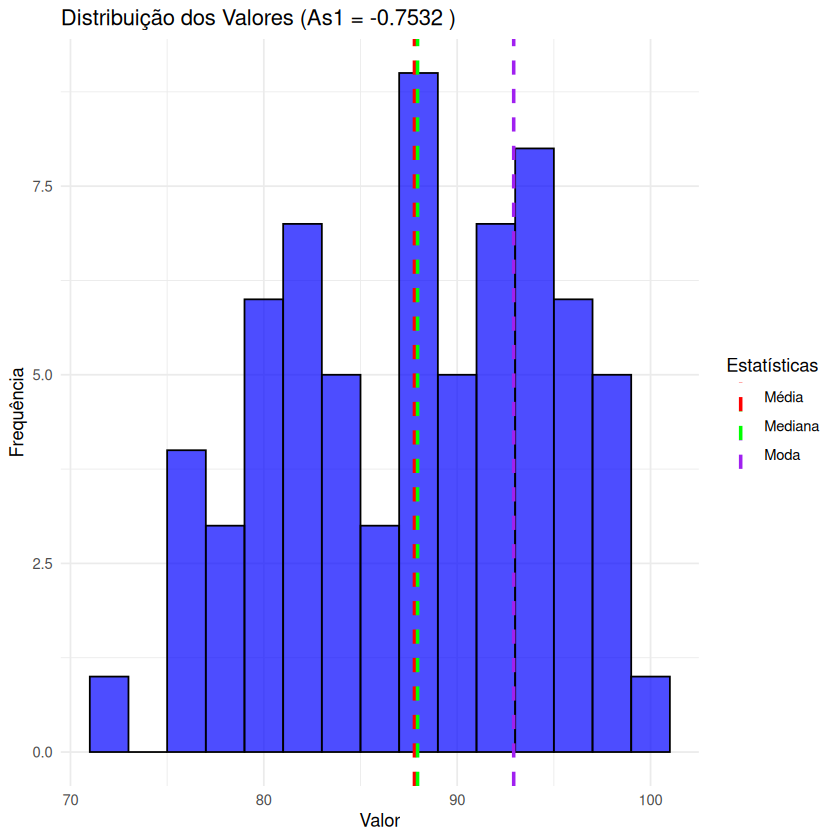

In [11]:
library(ggplot2)

ggplot(df, aes(x = Valor_numeric)) +
    geom_histogram(binwidth = 2, fill = "blue", color = "black", alpha = 0.7) +
    geom_vline(aes(xintercept = mean_val, color = "Média"), linetype = "dashed", linewidth = 1) +
    geom_vline(aes(xintercept = median_val, color = "Mediana"), linetype = "dashed", linewidth = 1) +
    geom_vline(aes(xintercept = mode_val, color = "Moda"), linetype = "dashed", linewidth = 1) +
    scale_color_manual(name = "Estatísticas", values = c("Média" = "red", "Mediana" = "green", "Moda" = "purple")) +
    labs(title = paste("Distribuição dos Valores (As1 =", round(As1, 4), ")"),
         x = "Valor",
         y = "Frequência") +
    theme_minimal()

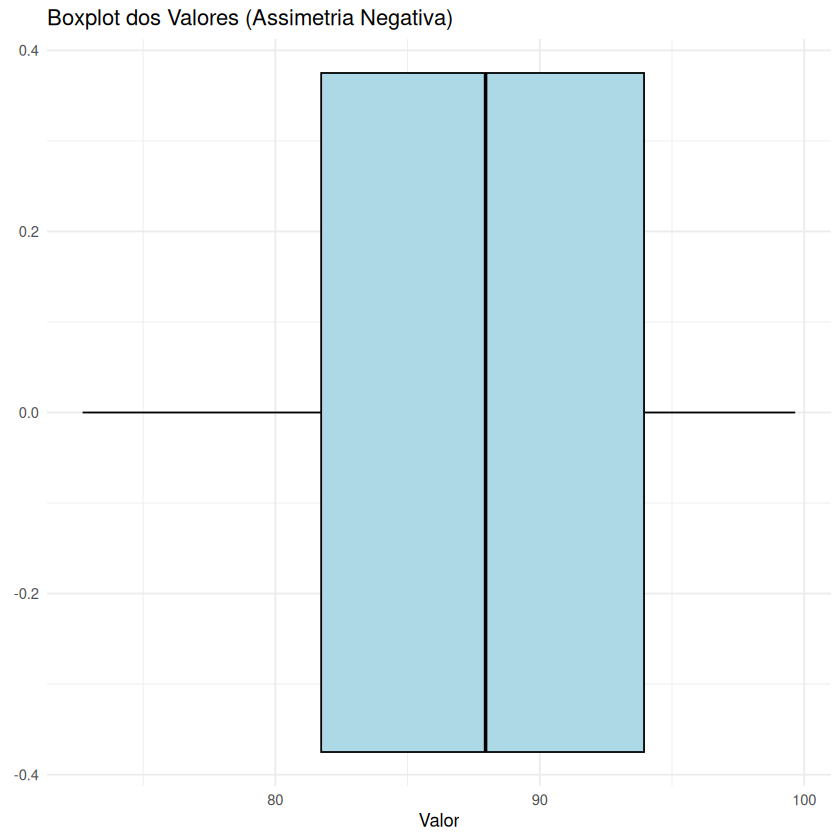

In [13]:
ggplot(df, aes(x = Valor_numeric)) +
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Boxplot dos Valores (Assimetria Negativa)",
         x = "Valor") +
    theme_minimal()

# Exemplo de curtose

In [15]:
# Calculate the coefficient of kurtosis for the Valor_numeric column using Fisher's g2 (unbiased excess kurtosis)
# Kurtosis measures the "tailedness" of the distribution.
# Fisher's g2 formula (unbiased excess kurtosis): g2 = [n(n+1)/((n-1)(n-2)(n-3))] * sum((x_i - mean)^4 / sd^4) - 3(n-1)^2/((n-2)(n-3))
# Where n is the number of observations, x_i are the values, mean is the sample mean, sd is the sample standard deviation.
# This is the excess kurtosis (subtracting 3 for the normal distribution baseline).

# Manual calculation using Fisher's g2
n <- length(df$Valor_numeric)
sum_term <- sum((df$Valor_numeric - mean_val)^4) / (sd_val^4)
g2 <- (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * sum_term - 3 * (n - 1)^2 / ((n - 2) * (n - 3))
kurtosis_val <- g2

# Print the kurtosis value
cat("Coeficiente de Curtose (excesso):", kurtosis_val, "\n")

# Interpretation
if (kurtosis_val > 0) {
    cat("Como a curtose =", kurtosis_val, "> 0, a distribuição é leptocúrtica (caudas mais pesadas, mais valores extremos).\n")
} else if (kurtosis_val < 0) {
    cat("Como a curtose =", kurtosis_val, "< 0, a distribuição é platicúrtica (caudas mais leves, menos valores extremos).\n")
} else {
    cat("Como a curtose =", kurtosis_val, "≈ 0, a distribuição é mesocúrtica (semelhante à distribuição normal).\n")
}

Coeficiente de Curtose (excesso): -1.040419 
Como a curtose = -1.040419 < 0, a distribuição é platicúrtica (caudas mais leves, menos valores extremos).


In [ ]:
# pacotes indicados pelo material do curso - livro do Favero

pacotes <- c("tidyverse", #carregar outros pacotes do R
             "knitr", "kableExtra", #formatação de tabelas
             "questionr", #tabela de frequências - função freq
             "e1071", #medidas de assimetria e curtose
             "plotly") #plataforma gráfica

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T, lib = meu_caminho_biblioteca)
    break()}
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
} else {
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
}


Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: knitr

Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: questionr

Loading required package: e1071


Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element


Loading required package: plotly


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following o

tidyverse      knitr kableExtra  questionr      e1071     plotly 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE

In [27]:

# Medidas de assimetria e curtose para a variável 'preço'
# Medidas de assimetria e curtose para a variável 'preço'
assimetria <- skewness(df$Valor_numeric, type = 2) # igual ao SPSS
curtose <- kurtosis(df$Valor_numeric, type = 2) # igual ao SPSS

cat("Assimetria =", assimetria, "\n")
cat("Curtose =", curtose, "\n")


Assimetria = -0.2250062 
Curtose = -1.040419 
